In [576]:
# SHIZA ALI
# 30 MAY 2022

In [532]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [533]:
funnel_data = pd.read_csv('dataset.csv')

In [534]:
funnel_data.head()

,user_id,created_at,event
0,1,2019-11-27 11:22,category-5-registered
1,1,2019-11-27 11:24,category-5-completed-profile
2,1,2019-11-27 11:24,category-5-started-application
3,2,2019-11-27 11:27,category-5-registered
4,2,2019-11-27 11:28,category-5-completed-profile


In [535]:
len(funnel_data)

26840

In [536]:
funnel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26840 entries, 0 to 26839
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     26840 non-null  int64 
 1   created_at  26840 non-null  object
 2   event       26840 non-null  object
dtypes: int64(1), object(2)
memory usage: 629.2+ KB


In [566]:
funnel_data['created_at'] = pd.to_datetime(funnel_data['created_at'])

In [538]:
funnel_data = funnel_data.sort_values(['user_id', 'created_at'])

In [539]:
#There are 5005 unique customer_ids
len(funnel_data['user_id'].unique())

5005

In [540]:
print('Minimum created datetime: ',min(funnel_data['created_at']))
print('Maximum created datetime: ',max(funnel_data['created_at']))
print('Difference between minumium and maximum datetimes: ',
      max(funnel_data['created_at']) - min(funnel_data['created_at']))

Minimum created datetime:  2019-11-27 11:22:00
Maximum created datetime:  2020-03-16 09:57:00
Difference between minumium and maximum datetimes:  109 days 22:35:00


In [541]:
funnel_data['category'] = funnel_data['event'].str.split('-',2).str[1]
funnel_data['event'] = funnel_data['event'].str.split('-',2).str[2]

In [542]:
#There are 8 key events in total
event_order = funnel_data['event'].unique().tolist()
event_order

['registered',
 'completed-profile',
 'started-application',
 'finished-application',
 'entered-checkout',
 'shipping-info',
 'payment-info',
 'fully-complete']

In [543]:
#There are seven different categories of customers
sorted(funnel_data['category'].unique())

['1', '2', '3', '4', '5', '6', '7']

In [564]:
funnel_data['time_duration_in_minutes'] = funnel_data.groupby('user_id')['created_at'].diff().dt.total_seconds()/60.0

In [565]:
funnel_data.head()

,user_id,created_at,event,category,time_duration_in_minutes
0,1,2019-11-27 11:22:00,registered,5,NaN
1,1,2019-11-27 11:24:00,completed-profile,5,2.0
2,1,2019-11-27 11:24:00,started-application,5,0.0
7,1,2019-11-27 11:32:00,finished-application,5,8.0
12,1,2019-11-27 11:35:00,entered-checkout,5,3.0


In [575]:
funnel_data[funnel_data.user_id == 4957]

,user_id,created_at,event,category,time_duration_in_minutes
23620,4957,2019-12-15 10:15:00,registered,3,NaN
23621,4957,2019-12-15 10:15:00,completed-profile,3,0.0
23624,4957,2019-12-15 10:17:00,payment-info,3,2.0
23632,4957,2019-12-15 10:28:00,shipping-info,3,11.0
23669,4957,2019-12-15 10:55:00,started-application,3,27.0
23675,4957,2019-12-15 11:00:00,finished-application,3,5.0
23677,4957,2019-12-15 11:01:00,entered-checkout,3,1.0
23678,4957,2019-12-15 11:01:00,shipping-info,3,0.0
23683,4957,2019-12-15 11:03:00,payment-info,3,2.0


## Acquistion_funnel Analysis

In [366]:
acquisition_funnel_df = funnel_data[['user_id', 'event']]

In [367]:
acquisition_funnel_df

,user_id,event
0,1,registered
1,1,completed-profile
2,1,started-application
7,1,finished-application
12,1,entered-checkout
...,...,...
26012,5013,completed-profile
26013,5013,started-application
26014,5013,finished-application
26015,5013,entered-checkout


In [25]:
acquisition_funnel_df = acquisition_funnel_df[~acquisition_funnel_df.duplicated(keep='last')]

In [26]:
acquisition_funnel_users_data = acquisition_funnel_df.groupby('user_id')['event'].apply(lambda x: x.tolist()).reset_index(name = "events_list")

In [568]:
acquisition_funnel_users_data.head()

,user_id,category,events_list
0,1,5,"[registered, completed-profile, started-application, finished-application, entered-checkout, shipping-info, payment-info, fully-complete]"
1,2,5,"[registered, completed-profile, started-application, finished-application, entered-checkout, shipping-info]"
2,3,5,"[registered, completed-profile, started-application, finished-application, entered-checkout, shipping-info]"
3,4,5,"[registered, completed-profile, started-application, finished-application]"
4,5,3,"[registered, completed-profile, started-application, finished-application, entered-checkout, shipping-info, payment-info, fully-complete]"


In [28]:
acquisition_funnel_dummies = acquisition_funnel_users_data.events_list.apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum()
acquisition_funnel_dummies = pd.concat([acquisition_funnel_users_data.drop('events_list', axis=1), acquisition_funnel_dummies], axis=1)

In [29]:
acquisition_funnel_dummies.head()

,user_id,completed-profile,entered-checkout,finished-application,fully-complete,payment-info,registered,shipping-info,started-application
0,1,1,1,1,1,1,1,1,1
1,2,1,1,1,0,0,1,1,1
2,3,1,1,1,0,0,1,1,1
3,4,1,0,1,0,0,1,0,1
4,5,1,1,1,1,1,1,1,1


In [502]:
filtered_acquisition_funnel_dummies = acquisition_funnel_dummies[acquisition_funnel_dummies['registered'] == 1]

In [515]:
filtered_acquisition_funnel_counts = filtered_acquisition_funnel_dummies.loc[:,event_order].sum().to_frame().reset_index().rename(columns = {'index':'Acquisition Step', 0 :'User Count'})
filtered_acquisition_funnel_counts

,Acquisition Step,User Count
0,registered,5002
1,completed-profile,4171
2,started-application,4114
3,finished-application,3072
4,entered-checkout,2468
5,shipping-info,2128
6,payment-info,1475
7,fully-complete,1118


In [522]:
filtered_acquisition_funnel_counts['Percentage Drop'] = (5002-filtered_acquisition_funnel_counts['User Count'])*100/5002

In [523]:
filtered_acquisition_funnel_counts['Percentage Drop Difference']= filtered_acquisition_funnel_counts['Percentage Drop'].diff()
filtered_acquisition_funnel_counts['Percentage Drop Difference']= round(filtered_acquisition_funnel_counts['Percentage Drop Difference'].fillna(0),0).astype(str) + '%'
filtered_acquisition_funnel_counts['Percentage Drop'] = round(100-filtered_acquisition_funnel_counts['Percentage Drop'],0).astype(str) + '%'

In [524]:
filtered_acquisition_funnel_counts

,Acquisition Step,User Count,Percentage Drop,Percentage Drop Difference
0,registered,5002,100.0%,0.0%
1,completed-profile,4171,83.0%,17.0%
2,started-application,4114,82.0%,1.0%
3,finished-application,3072,61.0%,21.0%
4,entered-checkout,2468,49.0%,12.0%
5,shipping-info,2128,43.0%,7.0%
6,payment-info,1475,29.0%,13.0%
7,fully-complete,1118,22.0%,7.0%


In [48]:
fig = px.funnel(filtered_acquisition_funnel_counts, x='User Count', y='Acquisition Step', text='Percentage Drop', template='seaborn', title = 'Customer Acquisition Funnel')
fig.show()

Major Dropoff points in the acquisition funnel:

-> finished application

-> completed profile

-> payment info

-> entered checkout

## Category wise Analysis

In [569]:
acquisition_funnel_df_category = funnel_data[['user_id','event']]
acquisition_funnel_df_category = acquisition_funnel_df_category[~acquisition_funnel_df_category.duplicated(keep='last')]
acquisition_funnel_df_category.head()

,user_id,event
0,1,registered
1,1,completed-profile
2,1,started-application
7,1,finished-application
12,1,entered-checkout


In [328]:
acquisition_funnel_users_data_category = acquisition_funnel_df_category.groupby('user_id')['event'].apply(lambda x: x.tolist()).reset_index(name = "events_list")

In [330]:
acquisition_funnel_df_category

,user_id,event
0,1,registered
1,1,completed-profile
2,1,started-application
7,1,finished-application
12,1,entered-checkout
...,...,...
26012,5013,completed-profile
26013,5013,started-application
26014,5013,finished-application
26015,5013,entered-checkout


In [331]:
users_category = funnel_data.groupby('user_id')['category'].min().reset_index()
acquisition_funnel_users_data_category = users_category.merge(acquisition_funnel_users_data_category, on='user_id', how='right')
acquisition_funnel_users_data_category.head()

,user_id,category,events_list
0,1,5,"[registered, completed-profile, started-application, finished-application, entered-checkout, shipping-info, payment-info, fully-complete]"
1,2,5,"[registered, completed-profile, started-application, finished-application, entered-checkout, shipping-info]"
2,3,5,"[registered, completed-profile, started-application, finished-application, entered-checkout, shipping-info]"
3,4,5,"[registered, completed-profile, started-application, finished-application]"
4,5,3,"[registered, completed-profile, started-application, finished-application, entered-checkout, shipping-info, payment-info, fully-complete]"


In [332]:
acquisition_funnel_category_dummies = acquisition_funnel_users_data_category.events_list.apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum()
acquisition_funnel_category_dummies = pd.concat([acquisition_funnel_users_data_category.drop('events_list', axis=1), acquisition_funnel_category_dummies], axis=1)

In [333]:
filtered_category_dummies = acquisition_funnel_category_dummies[acquisition_funnel_category_dummies['registered'] == 1]

In [570]:
filtered_category_dummies.head()

,user_id,category,completed-profile,entered-checkout,finished-application,fully-complete,payment-info,registered,shipping-info,started-application
0,1,5,1,1,1,1,1,1,1,1
1,2,5,1,1,1,0,0,1,1,1
2,3,5,1,1,1,0,0,1,1,1
3,4,5,1,0,1,0,0,1,0,1
4,5,3,1,1,1,1,1,1,1,1


In [335]:
category_acquisition_funnel_dummies = filtered_category_dummies.groupby('category')[event_order].apply(lambda x : (round(x.astype(int).mean()*100,0)))
category_acquisition_funnel_dummies

,registered,completed-profile,started-application,finished-application,entered-checkout,shipping-info,payment-info,fully-complete
category,,,,,,,,
1,100.0,95.0,94.0,72.0,65.0,60.0,48.0,44.0
2,100.0,83.0,83.0,78.0,72.0,67.0,50.0,56.0
3,100.0,87.0,86.0,59.0,52.0,45.0,27.0,20.0
4,100.0,83.0,75.0,75.0,67.0,67.0,58.0,58.0
5,100.0,78.0,77.0,61.0,44.0,37.0,28.0,20.0
6,100.0,60.0,40.0,20.0,20.0,10.0,10.0,10.0
7,100.0,79.0,79.0,72.0,58.0,55.0,45.0,33.0


In [572]:
category_acquisition_funnel_dummies_transposed = category_acquisition_funnel_dummies.T
category_acquisition_funnel_dummies_transposed = category_acquisition_funnel_dummies_transposed.reset_index().rename(columns = {'index':'Acquisition Step' })
category_acquisition_funnel_dummies_transposed

category,Acquisition Step,1,2,3,4,5,6,7
0,registered,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,completed-profile,95.0,83.0,87.0,83.0,78.0,60.0,79.0
2,started-application,94.0,83.0,86.0,75.0,77.0,40.0,79.0
3,finished-application,72.0,78.0,59.0,75.0,61.0,20.0,72.0
4,entered-checkout,65.0,72.0,52.0,67.0,44.0,20.0,58.0
5,shipping-info,60.0,67.0,45.0,67.0,37.0,10.0,55.0
6,payment-info,48.0,50.0,27.0,58.0,28.0,10.0,45.0
7,fully-complete,44.0,56.0,20.0,58.0,20.0,10.0,33.0


In [530]:
filtered_category_dummies.groupby('category')[event_order].apply(lambda x : x.astype(int).sum()).sort_values(by='registered', ascending=False)

,registered,completed-profile,started-application,finished-application,entered-checkout,shipping-info,payment-info,fully-complete
category,,,,,,,,
5,2324,1824,1799,1423,1016,853,649,466
3,2187,1906,1882,1297,1141,986,595,445
1,326,310,306,236,213,197,157,144
7,107,85,84,77,62,59,48,35
2,36,30,30,28,26,24,18,20
4,12,10,9,9,8,8,7,7
6,10,6,4,2,2,1,1,1


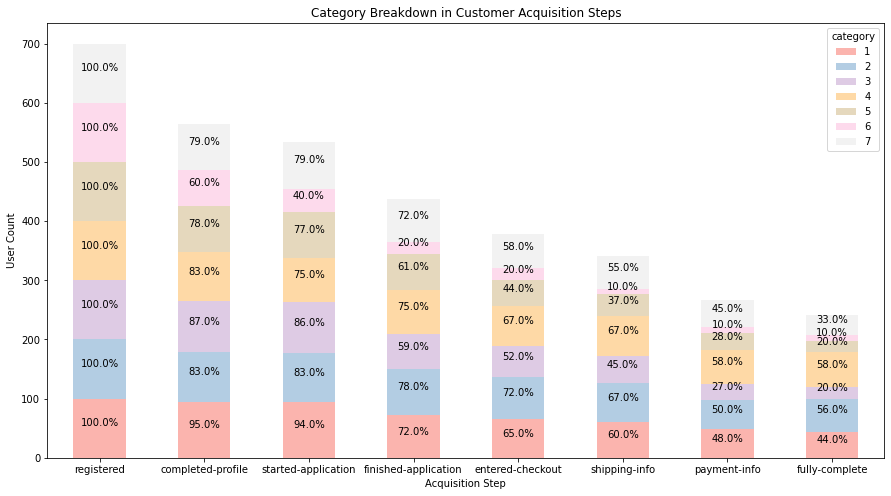

In [337]:
ax = category_acquisition_funnel_dummies_transposed.plot(x='Acquisition Step', kind='bar', stacked=True,
        title='Category Breakdown in Customer Acquisition Steps', colormap='Pastel1', figsize=(15, 8))

plt.ylabel('User Count')
ax.set_xticklabels(event_order,fontsize = 10, rotation=0)

for x in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[x], labels=(category_acquisition_funnel_dummies_transposed.iloc[0:,1+x]).astype(str)+'%', padding=5, label_type='center', rotation=0, color='black',fontsize=10)

plt.show()